**In this notebook we are using machine learning to predict the passengers which survived the Titanic shipwreck basesd on a number of features like age,fare,etc.**

**[The data](https://www.kaggle.com/c/titanic/data) we are using is a combination of values that belongs to the passengers of the Titanic. To get a description for the columns please refer to the link.**

**The competition score is the percentage of passengers we correctly predict.**


# 1. **Importing libraries**

In [1]:
import numpy as np
import pandas as pd 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. **Importing the dataset**

In [2]:
data=pd.read_csv(r'../input/titanic/train.csv')
testd=pd.read_csv(r'../input/titanic/test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. **Exploring the dataset**

**Let's check a brief description of the numerical values.**

**The values we care about here are Survived, Pclass, Age, SibSp, Parch and Fare.**

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Now let's see if there's any nan values.**

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin and Embarked has a number of nan values. Cabin column can be dropped because 687 values out of 891 are nan.**

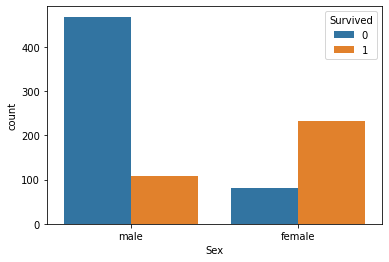

In [6]:
sns.countplot(x='Sex',data=data,hue='Survived')

**Most of the females survived. The opposite is true about males. **

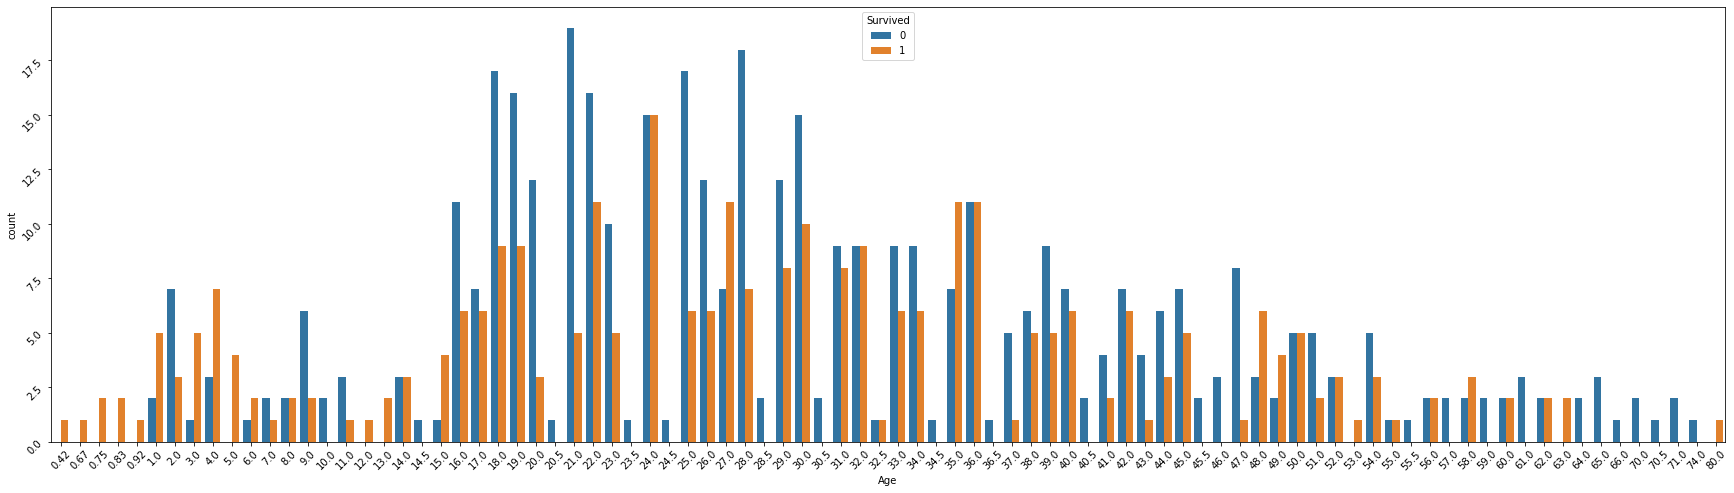

In [7]:
plt.figure(figsize=(30,8))
plt.tick_params(labelrotation=45)
sns.countplot('Age',data=data,hue='Survived',)

**The younger passengers had a better chance of surviving. Most of the passengers between 16 and 46 didn't make it.**

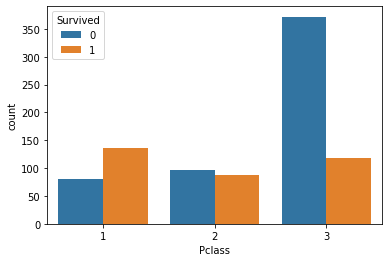

In [8]:
sns.countplot('Pclass',data=data,hue='Survived')

**The first class passengers had a better chance surviving compared to the third class passengers.**

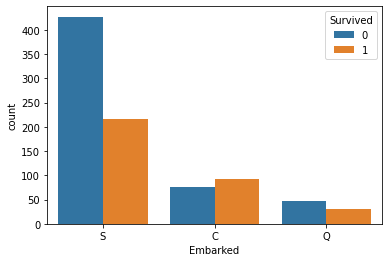

In [9]:
sns.countplot('Embarked',data=data,hue='Survived')

**The passengers who embarked at Southampton survived at lower rates compared to other areas. Might be because the passengers from Sothampton were mostly third class passengers. **

# 4. **Cleaning the data**

**Let's start with Embarked column. Based on the last plot the passengers who embarked at Cherbourg survived at a higher rate, thus that we will assume that the missing values are 'C'.**

In [10]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
data['Embarked']=data['Embarked'].fillna('C')

**Let's hot encode the data to make it interpretable by the computer.**

In [12]:
emb=pd.get_dummies(data['Embarked'],drop_first=True)
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [13]:
data.drop(['Sex','Embarked','Name','Cabin','Ticket'],axis=1,inplace=True)

In [14]:
data['Q']=emb['Q']
data['S']=emb['S']
data['male']=sex

In [15]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


**For the missing Pclass values let's make a boxplot of Pclass to the age values.**

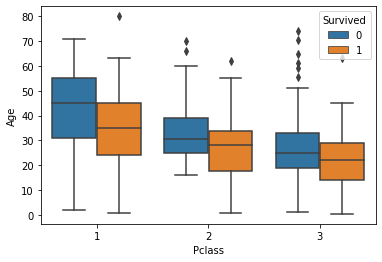

In [16]:
sns.boxplot(x='Pclass',y='Age',hue='Survived',data=data)

**We can tell that there's a difference in age average based on the class.**

In [17]:
data.groupby(['Pclass']).agg({'Age':np.mean})

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


**Now let's fill the missing values with the proper average. **

In [18]:
data.loc[data['Pclass']==3,'age']=25.140620
data.loc[data['Pclass']==2,'age']=29.877630
data.loc[data['Pclass']==1,'age']=38.233441

In [19]:
data.drop('Age',axis=1,inplace=True)

In [20]:
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Q,S,male,age
0,1,0,3,1,0,7.2500,0,1,1,25.140620
1,2,1,1,1,0,71.2833,0,0,0,38.233441
2,3,1,3,0,0,7.9250,0,1,0,25.140620
3,4,1,1,1,0,53.1000,0,1,0,38.233441
4,5,0,3,0,0,8.0500,0,1,1,25.140620


# 5. **Building the model**

In [21]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

**We should use a standardization method to scale the data. Let's use StandardScaler.**

In [22]:
X=data.iloc[:,2:10]
y=data.iloc[:,1:2].values.ravel()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**We will use xgboost to train the model.**

In [23]:
params_grid = {
'n_estimators': [100, 300 , 1000 , 3000 ],
'colsample_bytree': [0.3, 0.5],
'max_depth':[3,6,9]}
xboost=XGBClassifier()
gs = GridSearchCV(estimator=xboost,cv=3,param_grid=params_grid)

In [24]:
gs.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,

**The best params chosen by model.**

In [25]:
gs.best_params_

{'colsample_bytree': 0.3, 'max_depth': 9, 'n_estimators': 100}

# 6. **Making the predictions**

In [26]:
testd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Let's check the nan values in the test data.**

In [27]:
testd.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Let's hot encode first and drop the unnecessary columns.**

In [28]:
emb=pd.get_dummies(testd['Embarked'],drop_first=True)
sex=pd.get_dummies(testd['Sex'],drop_first=True)

In [29]:
testd.drop(['Sex','Embarked','Name','Cabin','Ticket'],axis=1,inplace=True)

In [30]:
testd['Q']=emb['Q']
testd['S']=emb['S']
testd['male']=sex

In [31]:
testd.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,892,3,34.5,0,0,7.8292,1,0,1
1,893,3,47.0,1,0,7.0000,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1
3,895,3,27.0,0,0,8.6625,0,1,1
4,896,3,22.0,1,1,12.2875,0,1,0


**Let's fill the missing values with the proper average. **

In [32]:
testd.groupby(['Pclass']).agg({'Age':np.mean})

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


In [33]:
testd.loc[testd['Pclass']==3,'age']=24.027945
testd.loc[testd['Pclass']==2,'age']=28.7775
testd.loc[testd['Pclass']==1,'age']=40.918367


In [34]:
testd.drop('Age',axis=1,inplace=True)

**We will do the same with Fare column.**

In [35]:
testd[testd['Fare'].isna()]

,PassengerId,Pclass,SibSp,Parch,Fare,Q,S,male,age
152,1044,3,0,0,NaN,0,1,1,24.027945


In [36]:
testd.groupby(['Pclass']).agg({'Fare':np.mean})

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [37]:
testd['Fare'].fillna(value=12.459678,inplace=True)

In [38]:
testd.isna().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Q              0
S              0
male           0
age            0
dtype: int64

**No nan values left.**

In [39]:
testd.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Q,S,male,age
0,892,3,0,0,7.8292,1,0,1,24.027945
1,893,3,1,0,7.0000,0,1,0,24.027945
2,894,2,0,0,9.6875,1,0,1,28.777500
3,895,3,0,0,8.6625,0,1,1,24.027945
4,896,3,1,1,12.2875,0,1,0,24.027945


In [40]:
test=testd.iloc[:,1:9]

**Scaling the test data.**

In [41]:
test = sc.transform(test)

**Making predictions.**

In [42]:
predictions=gs.predict(test)

In [43]:
submition=pd.DataFrame({'PassengerId':testd['PassengerId'],'Survived':predictions})

In [44]:
submition.to_csv('submission.csv',index=False)